### **Geospatial Operations - Germany**

- **Map** - in osmnx
- **Shortest distance** - in osmnx and in mapclassify
- **km distance** - in geopy


In [1]:
pip install netgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.3/339.3 kB 9.7 MB/s eta 0:00:00


In [2]:
pip install geopy

In [3]:
pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.8 MB/s eta 0:00:00


In [4]:
pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 2.0 MB/s eta 0:00:00


In [5]:
pip install geopandas

In [6]:
pip install folium matplotlib mapclassify

In [7]:
pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.6 MB/s eta 0:00:00


In [8]:
pip install ipyleaflet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [9]:
import re
import pandas as pd
import numpy as np
import bs4
import requests
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from IPython import display
import networkx.algorithms.approximation as nx_app
import math
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from netgraph import Graph
from matplotlib.animation import FuncAnimation
from IPython import display
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, LineString
import geoplot
import ipyleaflet
from ipyleaflet import Map, Marker
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim

**1. Germany Map**

(np.float64(5.4075345200000005),
 np.float64(15.50071168),
 np.float64(46.87865892),
 np.float64(55.49061348))

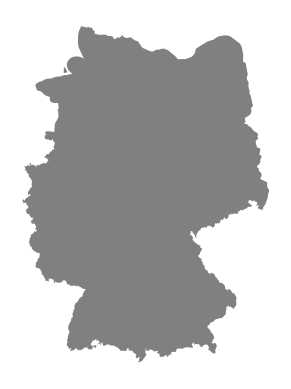

In [10]:
Germany = ox.geocode_to_gdf("Germany")
ax = Germany.plot(fc="gray", ec="none")
ax.axis("off")

In [ ]:
# find the latitude and longitude usign osmnx

In [11]:
G = ox.graph_from_place('Lindau, Germany', network_type='drive')
node_id = list(G.nodes)[0]
lon = G.nodes[node_id]['x'] #lon
lat= G.nodes[node_id]['y'] #lat
print(lon,lat)

9.7335447 47.5518566


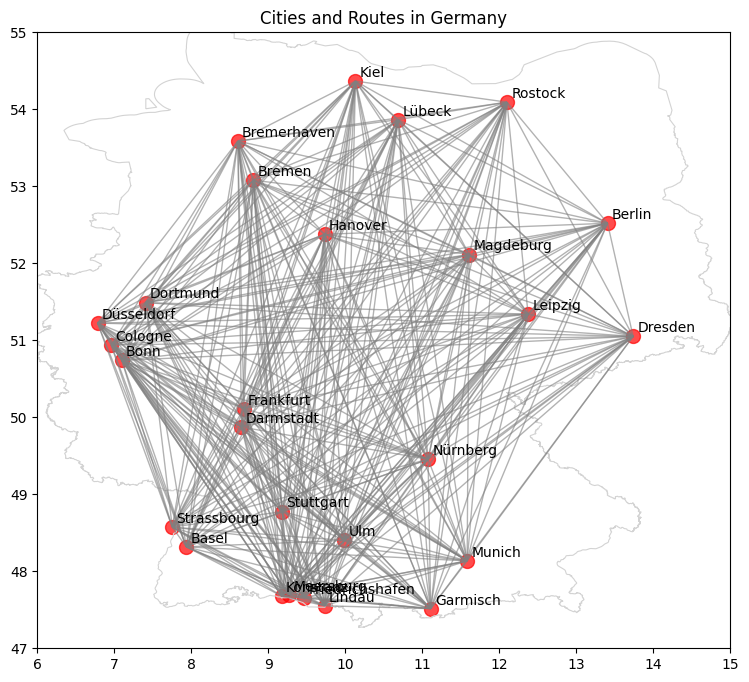

In [14]:
# Set the number of nodes (cities)
num_nodes = 27

# Define the city data
city_data = {
    'city': ['Lindau', 'Ulm', 'Darmstadt',
             'Friedrichshafen', 'Konstanz', 'Meersburg',
             'Berlin', 'Dortmund',
             'Dresden', 'Rostock','Frankfurt', 'Munich',
             'Cologne', 'Düsseldorf','Stuttgart', 'Basel',
             'Hanover', 'Magdeburg','Leipzig', 'Nürnberg',
             'Lübeck', 'Bremen','Bonn', 'Strassbourg',
             'Garmisch',  'Bremerhaven', 'Kiel'
             ],
    'lat': [47.5518566, 48.4011, 49.8728,
            47.6567,47.6780,47.6955,
            52.5200,51.489412,
            51.0504,54.0924, 50.1109,48.1351,
            50.9375,51.2230, 48.7758,48.3171574,
            52.3759,52.1132, 51.3397, 49.4543,
            53.8655, 53.0793, 50.7374, 48.5734,
            47.5145842, 53.5861467,  54.3659178
            ],
    'lng': [9.7335447, 9.9876, 8.6512,
            9.4650,9.1737,9.2718,
            13.4050, 7.4054395,
            13.7373,12.0991,8.6821,11.5820,
            6.9603,6.7825, 9.1829, 7.9352484,
            9.7320,11.6081,12.3731, 11.0746,
            10.6866, 8.8017, 7.0982, 7.7521,
            11.1081726,  8.603769, 10.1314895
            ]
}



# Create a complete graph with num_nodes nodes
G = nx.complete_graph(num_nodes)

# Add nodes to the graph with city names as labels
for i in range(num_nodes):
    G.nodes[i]['city'] = city_data['city'][i]

# Create a GeoDataFrame for the cities with Point geometries
gdf_cities = gpd.GeoDataFrame(city_data, geometry=gpd.points_from_xy(city_data['lng'], city_data['lat']))

# Create a GeoDataFrame for the routes (edges)
routes = []
for edge in G.edges():
    city1 = G.nodes[edge[0]]['city']
    city2 = G.nodes[edge[1]]['city']
    route = LineString([(gdf_cities[gdf_cities['city'] == city1].geometry.x.iloc[0], gdf_cities[gdf_cities['city'] == city1].geometry.y.iloc[0]),
                        (gdf_cities[gdf_cities['city'] == city2].geometry.x.iloc[0], gdf_cities[gdf_cities['city'] == city2].geometry.y.iloc[0])])
    routes.append(route)

gdf_routes = gpd.GeoDataFrame(geometry=routes)

# Create a plot for the map of Germany
fig, ax = plt.subplots(figsize=(10, 8))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # geopandas datasets retired
country_shapefile = Germany
country_shapefile.boundary.plot(ax=ax, color='lightgray', linewidth=0.8) # geopandas datasets retired
gdf_cities.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.7)
gdf_routes.plot(ax=ax, color='grey', linewidth=1, alpha=0.6)

# Add labels for the cities
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['city']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color='black', fontsize=10)

# Set the axis limits to focus on Germany
ax.set_xlim(6, 15)
ax.set_ylim(47, 55)

# Show the plot
plt.title('Cities and Routes in Germany')
plt.show()

**2. Shortest route - osmnx - within 1 City**

In [13]:
# load Germany
place = "Hamburg, Germany"
#cf ='["railway"~"rail"]'# custom filter cf
G = ox.graph_from_place(place, network_type="drive")

# Hamburg Airport coordinates
A_lat, A_lon = 53.6319, 9.9958
# Hamburg Hafen coordinates
B_lat, B_lon = 53.54772, 9.9694064

# fetch the nearest node w.r.t coordinates
A_node = ox.distance.nearest_nodes(G, A_lon, A_lat)
B_node = ox.distance.nearest_nodes(G, B_lon, B_lat)

print("Flughafen Node: {A_node}, \
Hafen Node: {B_node}".format(
    A_node=A_node, B_node=B_node))

Flughafen Node: 618689308, Hafen Node: 3032426990


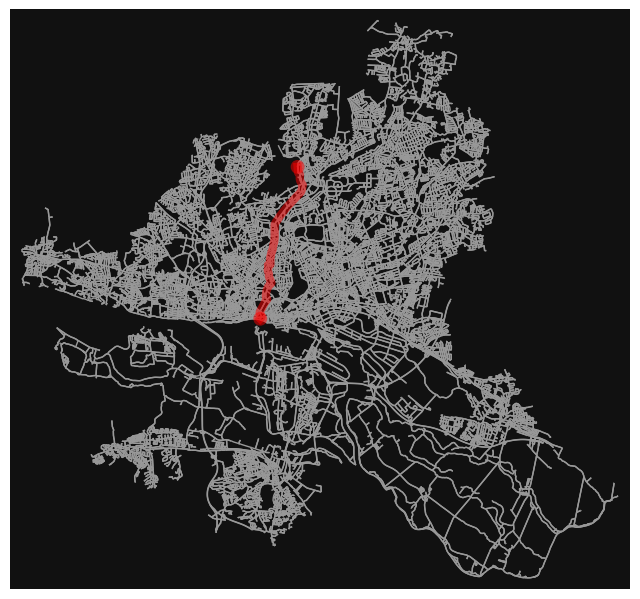

In [25]:
# orgin node and destination node
orig, dest = 618689308, 3032426990

# find shortest path
route_nodes = ox.routing.shortest_path(G, orig, dest, weight="length")

# plot the shortes path
fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r",
                              route_linewidth=6, node_size=0)

**3. Shortest Distance - mapclassify - spatial data included**

In [26]:
def generate_multindex(route_nodes):
    multiindex_list = []
    # append the index to list
    for u, v in zip(route_nodes[:-1], route_nodes[1:]):
        multiindex_list.append((u, v, 0))
    return multiindex_list


# get edges from from above multidigraph
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# generate multiindex based on generated shortest route
multiindex_list = generate_multindex(route_nodes)
# fetch edge details based on multi index list
shrt_gdf_edges = gdf_edges[gdf_edges.index.isin(multiindex_list)]
# plot the shortest route on map
shrt_gdf_edges.explore(color="red")

**4. Geopy - distance between Cities**

In [15]:
city1 = input("Enter first city name :")
city2 = input("Enter second city name :")

Enter first city name :Lindau
Enter second city name :Dortmund


In [17]:
geolocator = Nominatim(user_agent="MyApp")

In [18]:
location_city1 = geolocator.geocode(city1)
location_city2 = geolocator.geocode(city2)

In [19]:
lat_long_city1 = (location_city1.latitude ,location_city1.longitude)
lat_long_city2 = (location_city2.latitude ,location_city2.longitude)

In [20]:
distance = GD(lat_long_city1 , lat_long_city2).km

In [23]:
print(f"The distance between {city1} and {city2} is { distance} km.")

The distance between Lindau and Dortmund is 469.32120294769453 km.


https://gadm.org/download_country.html#google_vignette

https://gdsl-ul.github.io/wma/labs/w07_OSM.html


https://bechirtr97.medium.com/solving-optimal-shipment-route-problem-using-christofides-serdyukov-algorithm-simplex-and-a788f5e89d18
